# Biodiversity Portfolio Project

I will go through the files, try to figure out what they are about, the type of questions I could answer and then clean the data in order to prepare the relevant graphics and so on

Step 0: Problem Understanding – What is the problem? Who does it impact and how much? How is it being solved today and what are some of the gaps?
We have two set of data and we want to look for findings about endanger species in national parks. 

Step 1: Goals – What are the goals of the project? How will we know if our project is successful?
We are looking for patterns or ways to identify how they become endangered.
If we do not find any patterns, links we can consider the project a failure - or that we are missing data.
If we highlight few patterns, trends that lead a species to the endanger zone, we'll be successful.
It could also be about the parks themselves.

Missing numbers

Step 2: Actions – What actions or interventions will this work inform?
Could be:
- actions that parks can take to avoid species to become endanger
- actions about most endangered species that should be more protected
- actions about specific parks that are not protecting enough the species

Step 3: Data – What data do you have access to internally? What data do you need?
What can you augment from external and/or public sources?
Two datasets and that's it :-)

Step 4: Analysis – What analysis needs to be done? Does it involve description, detection, prediction, or behavior change? How will the analysis be validated?
Description including the most endangered species or the parks with the most species endangered

Detection: not so sure now
Prediction: not so sure now

Ethical Considerations:  What are the privacy, transparency, discrimination/equity, and accountability issues around this project and how will you tackle them?
Can't see any now.

Additional Considerations: How will you deploy your analysis as a new system so that it can be updated and integrated into the organization’s operations? How will you evaluate the new system in the field to make sure it accomplishes your goals? How will you monitor your system to make sure it continues to perform well over time?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Importing the data from the two csv files

In [3]:
observations = pd.read_csv('observations.csv',encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
species = pd.read_csv('species_info.csv',encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


# Data size and characteristic
There are 23 296 entries with 3 columns and no NaN values for the observations dataframe

There 5824 entries with 4 columns and only 191 non-null for the "conservation status"

In [5]:
print(observations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [6]:
print(species.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [7]:
print(species['conservation_status'].value_counts())

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64


They are so many NaN values for the conservation status that it seems a bit vain to search for patterns. 
Only 3.3% of the species have a conservation status.

After research, it seems than  when the status is set to NaN, it means the specy is not endangered. It could be better to change NaN to a more specific status so that when new observations come, we can make the difference between species that are not in danger from species that are not qualified.

# Visualization and exploration

first graph will display the distribution of the endangered species.
The status the most frequent is "Species of concern" with nearly 85% of the status.
Very few species are in recovery.

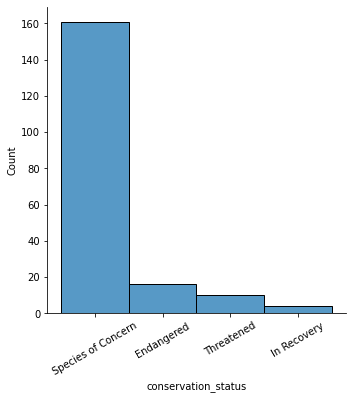

In [8]:

sns.displot(species['conservation_status'])
plt.xticks(rotation=30)
plt.show()

## repartition of species

A majority of species belongs to **vascular plants** with 4470 out of 5824
It could be interesting to see if the proportion of endangerd species change depending on the category.


Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64


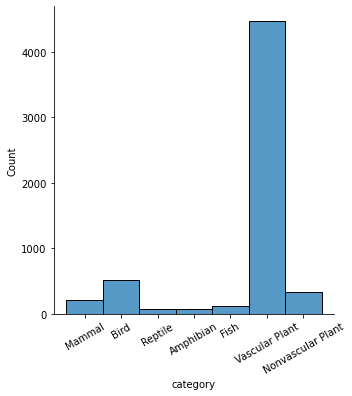

In [9]:
print(species['category'].value_counts())

sns.displot(species['category'])
plt.xticks(rotation=30)
plt.show()

## how many parks is there?

There are only four parks. 


It could be interesting to see if the category split is the same depending on the parks, to see the number of observations per park.
Also, looking for a percentage of endanger species per park could be interesting.

In [10]:
park_names = observations['park_name'].unique()
print("The name of the parks are: {}".format(park_names))


The name of the parks are: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Let's have a look at the number of observations:
that is 3,314,739 observations

In [11]:
print(observations['observations'].sum())

3314739


Let's see how many species there are in each parks, before comparing the observations

In [22]:
for park in park_names:
    print('there are {} scientific name in the {} park'.format(observations[observations['park_name'] == park].scientific_name.count(), park))

there are 5824 in the Great Smoky Mountains National Park park
there are 5824 in the Yosemite National Park park
there are 5824 in the Bryce National Park park
there are 5824 in the Yellowstone National Park park


In [13]:
for park in park_names:
    print("There are {} observations in the {}".format(observations[observations['park_name'] == park].observations.sum(), park))

There are 431820 observations in the Great Smoky Mountains National Park
There are 863332 observations in the Yosemite National Park
There are 576025 observations in the Bryce National Park
There are 1443562 observations in the Yellowstone National Park


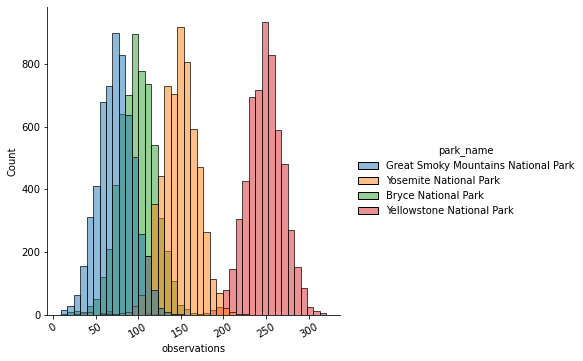

In [14]:
sns.displot(data=observations, x='observations', hue='park_name')
plt.xticks(rotation=30)
plt.show()


# Analysis

After a first exploration, let's analyse the data, in particular the "conservation status" column.
First, let's replace all the "NaN" value by a more meaningful value "No Danger"

In [26]:
species['conservation_status'].fillna('No Danger', inplace=True)
species['conservation_status'].value_counts()

No Danger             5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

Now we will look at the endanger species status depending on their category

In [41]:
conservation_category = species[species['conservation_status'] != 'No Danger'].groupby(['category', 'conservation_status'])['scientific_name'].count().unstack()

conservation_category

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,1.0,NaN,4.0,2.0
Bird,4.0,3.0,72.0,NaN
Fish,3.0,NaN,4.0,4.0
Mammal,7.0,1.0,28.0,2.0
Nonvascular Plant,NaN,NaN,5.0,NaN
Reptile,NaN,NaN,5.0,NaN
Vascular Plant,1.0,NaN,43.0,2.0


# Conclusion